# Atividade Complementar  – Aprendizado de Máquina – 2022.1
## Professora Ana Luiza Bessa de Paula Barros
## Ciência da computação - UECE


## Visualização dos Dados

Continuando a atividade passada. Vamos aprender a visualizar e separar dados da base de dados carregada.

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv(r'/content/athlete_events.csv')

In [5]:
dataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
# .tail() mostra os cinco ultimos dados do dataset por padrão
dataset.tail(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [8]:
# dimensão do dataset
dataset.shape

(271116, 15)

In [9]:
dataset

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [10]:
dataset.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [11]:
index_faltantes = dataset.loc[dataset['Height'].isnull()].index

In [12]:
index_faltantes

Int64Index([     2,      3,     29,     35,     36,     37,     38,     39,
                58,     83,
            ...
            271005, 271010, 271030, 271031, 271034, 271038, 271042, 271043,
            271075, 271100],
           dtype='int64', length=60171)

## Procedimentos para dados faltantes

**1)** Preencher manualmente: porém nem sempre é possível conseguir os dados que estão faltando e imputar manualmente.

2) Remover a coluna (features/atributo) inteira que contém dados faltantes: 

In [13]:
# fazendo uma copia do conjuntos de dados
dataset2 = dataset.copy()
dataset2.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


In [14]:
dataset2.shape

(271116, 15)

In [15]:
# removendo a coluna Medal
# Remova linhas ou colunas especificando nomes de rótulos e eixos correspondentes 
# ou especificando diretamente nomes de índices ou colunas. 
# Ao usar um índice múltiplo, os rótulos em diferentes níveis podem ser removidos especificando o nível.
# axis : {0 or ‘index’, 1 or ‘columns’}, default 0
# inplace : bool, default False. Se True, faça a operação inplace e retorne None.
dataset2.drop('Medal', axis = 1, inplace=True)
dataset2.shape

(271116, 14)

In [16]:
dataset2.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football


In [17]:
dataset2.isnull().sum()

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
dtype: int64

**3)** Remover somente as linhas que tiverem dados faltantes:

In [18]:
dataset3 = dataset.copy()
index_faltantes2 = dataset.loc[dataset['Age'].isnull()].index
dataset3.drop(index_faltantes2, inplace=True)


In [19]:
dataset3.shape

(261642, 15)

In [20]:
dataset.shape

(271116, 15)

In [21]:
dataset3.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height     51574
Weight     54263
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     222591
dtype: int64

**4)** Preencher com a média (em casos de váriaveis numéricas)

Para calcular a média de uma coluna, usaremos o seguinte comando: 

conjunto de dados['coluna'].mean()

In [22]:
dataset4 = dataset.copy()

In [23]:
dataset4.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Vamos usar a média para as colunas Age, Height e Weight 

In [24]:
dataset4['Age'].mean()

25.556898357297374

In [25]:
dataset4['Height'].mean()

175.33896987366376

In [26]:
dataset4['Weight'].mean()

70.70239290053351

In [27]:
# Para substituir usaremos outro comando:
dataset4['Age'].fillna(dataset4['Age'].mean(), inplace=True)
dataset4['Height'].fillna(dataset4['Height'].mean(), inplace=True)
dataset4['Weight'].fillna(dataset4['Weight'].mean(), inplace=True)

In [28]:
dataset.iloc[index_faltantes2]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN
152,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Individual",NaN
153,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Team",NaN
162,66,Mohamed Abakkar,M,NaN,156.0,48.0,Sudan,SUD,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN
212,102,Sayed Fahmy Abaza,M,NaN,NaN,NaN,Egypt,EGY,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270679,135368,Antonio A. Zucchi,M,NaN,NaN,NaN,Argentina,ARG,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,NaN
270774,135416,Star Zulu,M,NaN,NaN,NaN,Zambia,ZAM,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Bantamweight,NaN
270793,135426,Max Zumstein,M,NaN,NaN,NaN,Switzerland,SUI,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,NaN
270804,135434,Edmundo Ziga Erraz,M,NaN,180.0,95.0,Chile,CHI,1948 Summer,1948,Summer,London,Athletics,Athletics Men's Hammer Throw,NaN


In [29]:
dataset4.iloc[index_faltantes2]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,25.556898,175.33897,70.702393,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN
152,58,Georgi Abadzhiev,M,25.556898,175.33897,70.702393,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Individual",NaN
153,58,Georgi Abadzhiev,M,25.556898,175.33897,70.702393,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Team",NaN
162,66,Mohamed Abakkar,M,25.556898,156.00000,48.000000,Sudan,SUD,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN
212,102,Sayed Fahmy Abaza,M,25.556898,175.33897,70.702393,Egypt,EGY,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270679,135368,Antonio A. Zucchi,M,25.556898,175.33897,70.702393,Argentina,ARG,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,NaN
270774,135416,Star Zulu,M,25.556898,175.33897,70.702393,Zambia,ZAM,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Bantamweight,NaN
270793,135426,Max Zumstein,M,25.556898,175.33897,70.702393,Switzerland,SUI,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,NaN
270804,135434,Edmundo Ziga Erraz,M,25.556898,180.00000,95.000000,Chile,CHI,1948 Summer,1948,Summer,London,Athletics,Athletics Men's Hammer Throw,NaN


In [30]:
dataset4.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

### Dados Estatísticos

In [31]:
# Para dados numéricos, o índice do resultado incluirá count, mean, std, min, max
# bem como os 50percentis inferiores e superiores. Por padrão, o percentil inferior é 25e o percentil superior é 75. 
# O 50percentil é o mesmo que a mediana.
dataset.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [32]:
genero = dataset['Sex'].value_counts(sort=True)
print("Genero Quantidades:")
print(genero)

Genero Quantidades:
M    196594
F     74522
Name: Sex, dtype: int64


In [37]:
# qual a moda da idade
dataset["Age"].mode()

0    23.0
dtype: float64

In [34]:
dataset["Height"].mode()[0]

180.0

## Extrair um novo conjunto de dado do conjunto de dado "athlete_events.csv"


In [38]:
# criando um novo dataset com apenas atletas masculino
# loc é a funçaõ q seleciona toda a linha
masculino = dataset.loc[dataset['Sex']=='M']


In [39]:
masculino.describe()

,ID,Age,Height,Weight,Year
count,196594.000000,187544.000000,143567.000000,141470.000000,196594.000000
mean,67601.598304,26.277562,178.858463,75.743677,1973.046064
std,39036.820069,6.474972,9.360318,13.211610,31.127867
min,1.000000,10.000000,127.000000,28.000000,1896.000000
25%,33868.250000,22.000000,172.000000,67.000000,1952.000000
50%,67271.500000,25.000000,179.000000,74.000000,1980.000000
75%,101638.000000,29.000000,185.000000,83.000000,2000.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [40]:
masculino.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN


In [41]:
X = masculino.iloc[:,[0,2,3,4]]
X

,ID,Sex,Age,Height
0,1,M,24.0,180.0
1,2,M,23.0,170.0
2,3,M,24.0,NaN
3,4,M,34.0,NaN
10,6,M,31.0,188.0
...,...,...,...,...
271111,135569,M,29.0,179.0
271112,135570,M,27.0,176.0
271113,135570,M,27.0,176.0
271114,135571,M,30.0,185.0


In [42]:
Z = masculino.iloc[:,0:5]
Z

,ID,Name,Sex,Age,Height
0,1,A Dijiang,M,24.0,180.0
1,2,A Lamusi,M,23.0,170.0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN
10,6,Per Knut Aaland,M,31.0,188.0
...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0
271112,135570,Piotr ya,M,27.0,176.0
271113,135570,Piotr ya,M,27.0,176.0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0


In [43]:
Y = masculino.iloc[:,4]
Y

0         180.0
1         170.0
2           NaN
3           NaN
10        188.0
          ...  
271111    179.0
271112    176.0
271113    176.0
271114    185.0
271115    185.0
Name: Height, Length: 196594, dtype: float64

In [44]:
# selecionando as colunas em duas variaveis
altura = masculino['Height']
altura

0         180.0
1         170.0
2           NaN
3           NaN
10        188.0
          ...  
271111    179.0
271112    176.0
271113    176.0
271114    185.0
271115    185.0
Name: Height, Length: 196594, dtype: float64

#Plotando gráficos

Para geramos gráficos vamos importar a biblioteca matplotlib.pyplot e seaborn.

Para mais informações sobre as bibliotecas acesse os links (neles encontra toda a documentação e funções contidas nessa biblioteca):

[Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)

[Seaborn](https://seaborn.pydata.org/)

## Gráfico de dispersão

In [45]:
import matplotlib.pyplot as plt

In [46]:
peso = masculino['Weight']

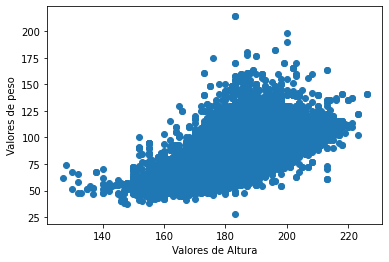

In [47]:
plt.scatter(altura,peso)
plt.ylabel('Valores de peso')
plt.xlabel('Valores de Altura')
# show() mostra o gráfico gerado pela associação dada na função scatter
plt.show()

## Histograma

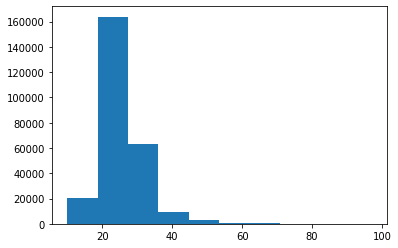

In [48]:
plt.hist(x = dataset['Age']);

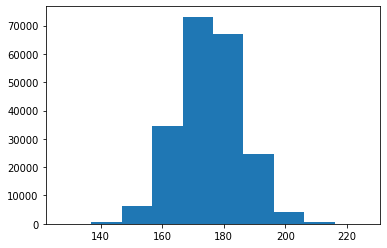

In [49]:
plt.hist(x = dataset['Height']);

## Gráfico de colunas

In [50]:
# Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib . 
# Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.
# fornece funções simples de usar para criação de gráficos que seriam complexos apenas com o Matplotlib.
import seaborn as sns

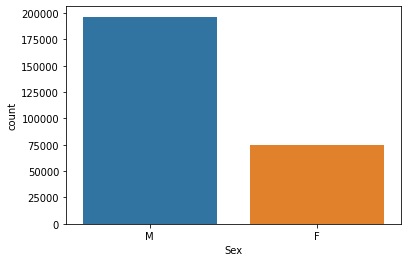

In [51]:
sns.countplot(x = dataset['Sex']);

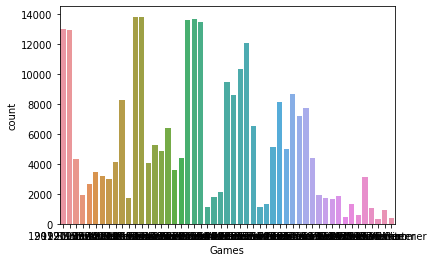

In [52]:
sns.countplot(x = dataset['Games']);

## Boxplot

In [53]:
newdataset = dataset.loc[dataset['Age']<=35.0]
ndataset = newdataset.loc[newdataset['Age']>=20]
ndataset.describe()

,ID,Age,Height,Weight,Year
count,212955.000000,212955.000000,174549.000000,172634.000000,212955.000000
mean,68346.454519,25.464694,176.231683,71.887142,1981.323031
std,38965.888711,3.808524,10.150442,14.005595,28.223015
min,1.000000,20.000000,127.000000,28.000000,1896.000000
25%,34955.000000,22.000000,169.000000,62.000000,1964.000000
50%,68252.000000,25.000000,176.000000,70.000000,1988.000000
75%,102140.000000,28.000000,183.000000,80.000000,2004.000000
max,135571.000000,35.000000,226.000000,214.000000,2016.000000


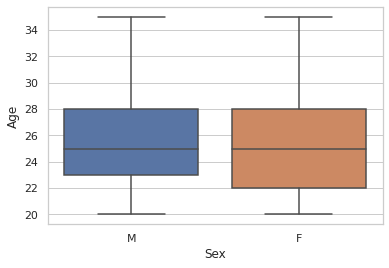

In [58]:
# use to set style of background of plot
sns.set(style="whitegrid")
sns.boxplot(x='Sex', y='Age', data=ndataset);